In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Cab_Data = pd.read_csv('/kaggle/input/cabs-fare-data/Cab_Data.csv')
Customer_Data = pd.read_csv('../input/cabs-fare-data/Customer_ID.csv')
Transaction_Data = pd.read_csv('../input/cabs-fare-data/Transaction_ID.csv')
City_Data = pd.read_csv('../input/cabs-fare-data/City.csv')

In [3]:
Cab_Data.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
Customer_Data.head()


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
Transaction_Data.head()


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
City_Data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
Cab_Data.info()
Customer_Data.info()
Transaction_Data.info()
City_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

In [8]:
Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'])

In [9]:
Cab_Data['Month'] = Cab_Data['Date of Travel'].apply(lambda time: time.month)
Cab_Data['Year'] = Cab_Data['Date of Travel'].apply(lambda time: time.year)

In [10]:
Cab_Data.rename(columns = {'Transaction ID':'Transaction_ID'}, inplace = True)
Transaction_Data.rename(columns = {'Transaction ID':'Transaction_ID'}, inplace = True)


In [11]:
Cab_Data.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,8,2016
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,6,2016
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2,2016
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,7,2016
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,3,2016


In [12]:
p_cab_transaction_permonth= Cab_Data[Cab_Data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
p_cab_transaction_permonth

Month
1     4734
2     4693
3     5724
4     5118
5     6150
6     6371
7     7048
8     8011
9     8518
10    9936
11    8679
12    9729
Name: Transaction_ID, dtype: int64

Text(0.5, 1.0, 'Travel frequency by Month (Pink Cab)')

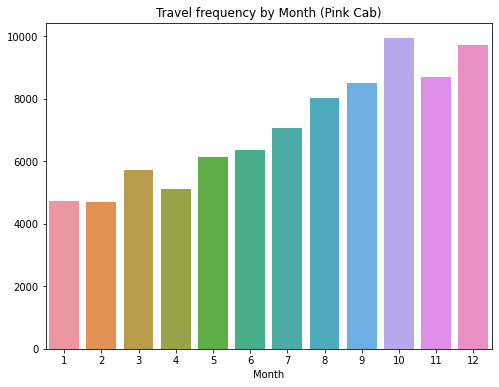

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x=p_cab_transaction_permonth.index,y=p_cab_transaction_permonth.values)
plt.title('Travel frequency by Month (Pink Cab)')


In [14]:
y_cab_transaction_permonth = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
y_cab_transaction_permonth

Month
1     17108
2     17338
3     20754
4     19077
5     21309
6     20568
7     23177
8     24027
9     25377
10    29273
11    26538
12    30135
Name: Transaction_ID, dtype: int64

Text(0.5, 1.0, 'Travel frequency by Month (Yellow Cab)')

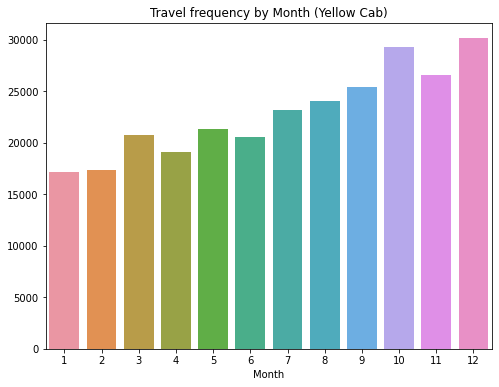

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x=y_cab_transaction_permonth.index,y=y_cab_transaction_permonth.values)
plt.title('Travel frequency by Month (Yellow Cab)')

By looking at graph we can see that yellow cab has more transactions on holidays like December

In [16]:
df = Merged_Data = Cab_Data.merge(Transaction_Data, on= 'Transaction_ID').merge(Customer_Data, on ='Customer ID').merge(City_Data, on = 'City')

In [17]:
df.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,"814,885","24,701"


In [18]:
df.isnull().sum()

Transaction_ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Month                 0
Year                  0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [19]:
YellowCab = df[df['Company']=='Yellow Cab']
PinkCab = df[df['Company']=='Pink Cab']

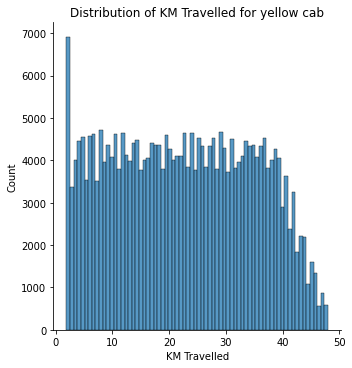

In [20]:
sns.displot(x='KM Travelled', data = YellowCab).set(title='Distribution of KM Travelled for yellow cab')


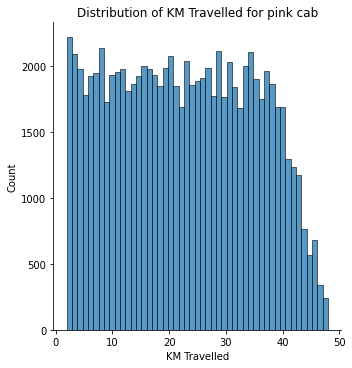

In [21]:
sns.displot(x='KM Travelled', data = PinkCab).set(title='Distribution of KM Travelled for pink cab')


[Text(0.5, 1.0, 'Distribution of price charged for yellow cab')]

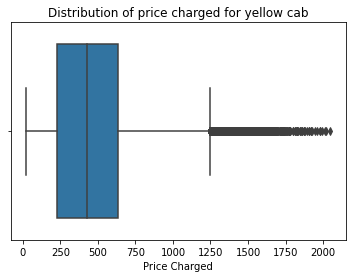

In [22]:
sns.boxplot(x='Price Charged', data = YellowCab).set(title='Distribution of price charged for yellow cab')


[Text(0.5, 1.0, 'Distribution of price charged for Pink cab')]

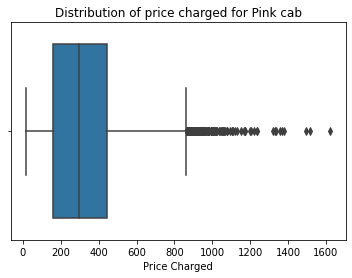

In [23]:
sns.boxplot(x='Price Charged', data = PinkCab).set(title='Distribution of price charged for Pink cab')


[Text(0.5, 1.0, 'price charged per km for yellow cab')]

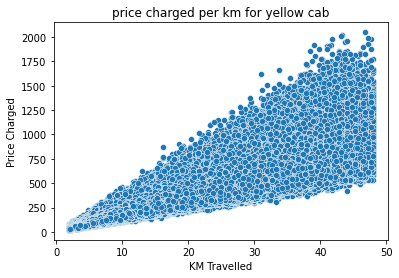

In [24]:
sns.scatterplot(x='KM Travelled', y = 'Price Charged', data= YellowCab ).set(title='price charged per km for yellow cab')

[Text(0.5, 1.0, 'price charged per km for pink cab')]

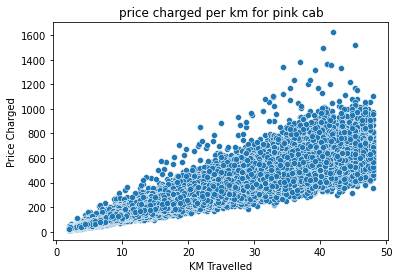

In [25]:
sns.scatterplot(x='KM Travelled', y = 'Price Charged', data= PinkCab ).set(title='price charged per km for pink cab')

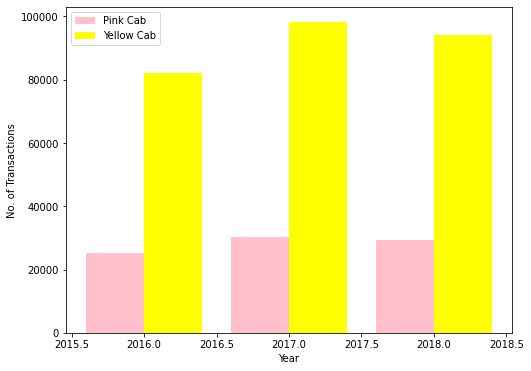

In [26]:
plot1 = df[df.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = df[df.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(8,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink',label='Pink Cab')
ax.bar(plot2.index+0.2, plot2.values, width=0.4, color='yellow',label='Yellow Cab')
plt.ylabel('No. of Transactions')
plt.xlabel('Year')
plt.legend()

In [27]:
df.rename(columns = {'Price Charged':'Price_Charged'}, inplace = True)
df.rename(columns = {'Cost of Trip':'Cost_of_Trip'}, inplace = True)


In [28]:
df

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,3,2018,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,4,2018,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,2018-06-07,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,6,2018,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,2018-02-08,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2,2018,51406,Cash,Female,29,6829,"418,859","127,001"


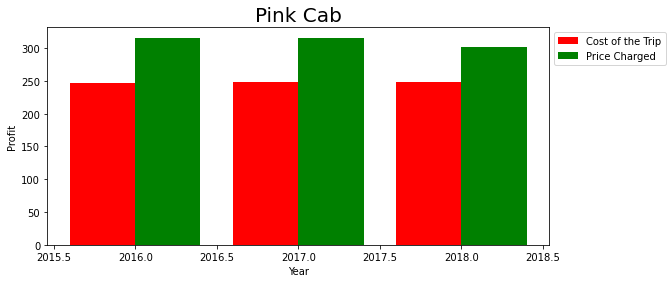

In [29]:
plot3 = df[df.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = df[df.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot4.index-0.2, plot4.values, width=0.4, color='red', align='center',label='Cost of the Trip')
ax.bar(plot3.index+0.2, plot3.values, width=0.4, color='green', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Pink Cab', fontsize=20)
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

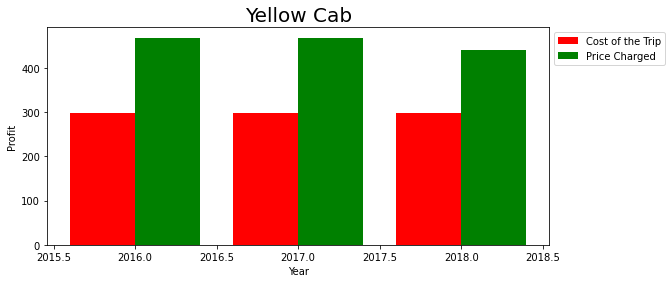

In [30]:
plot5 = df[df.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot6 = df[df.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot6.index-0.2, plot6.values, width=0.4, color='red', align='center',label='Cost of the Trip')
ax.bar(plot5.index+0.2, plot5.values, width=0.4, color='green', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Yellow Cab', fontsize=20)
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

Yellow cab has higher profit

[Text(0.5, 1.0, 'price charged per city for yellow cab')]

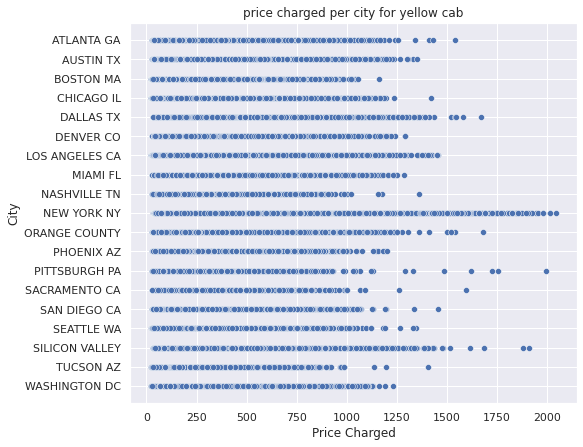

In [31]:
sns.set(rc={'figure.figsize':(8,7)})

sns.scatterplot(x='Price Charged', y = 'City', data= YellowCab ).set(title='price charged per city for yellow cab')

[Text(0.5, 1.0, 'price charged per city for pink cab')]

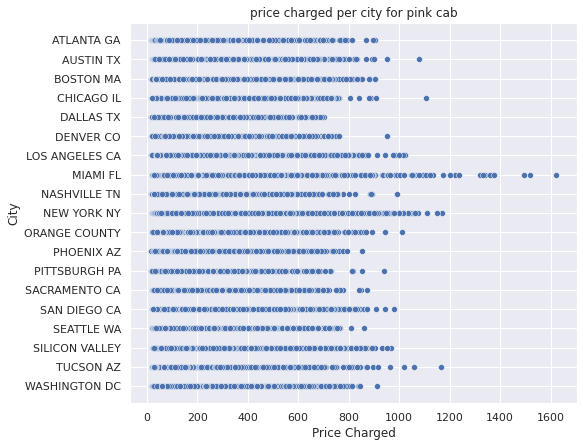

In [32]:
sns.scatterplot(x='Price Charged', y = 'City', data= PinkCab ).set(title='price charged per city for pink cab')


In [33]:
df

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,3,2018,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,4,2018,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,2018-06-07,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,6,2018,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,2018-02-08,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2,2018,51406,Cash,Female,29,6829,"418,859","127,001"


In [34]:
city_customers= df.groupby('City').Users.count()
city_customers

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

Text(0.5, 1.0, 'customers per City')

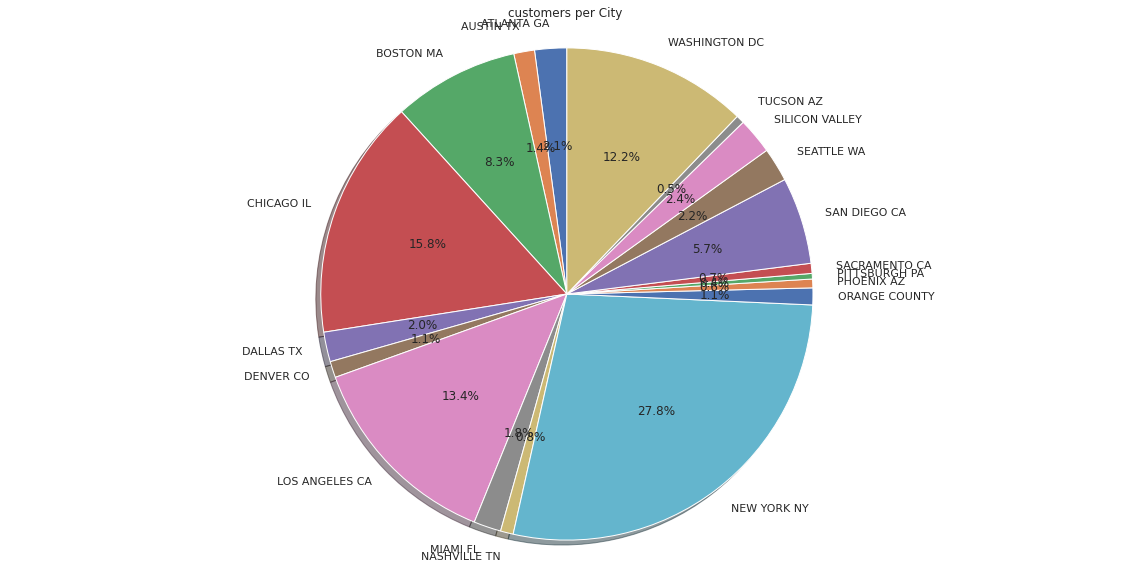

In [35]:
labs = city_customers.index
vals = city_customers.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('customers per City')


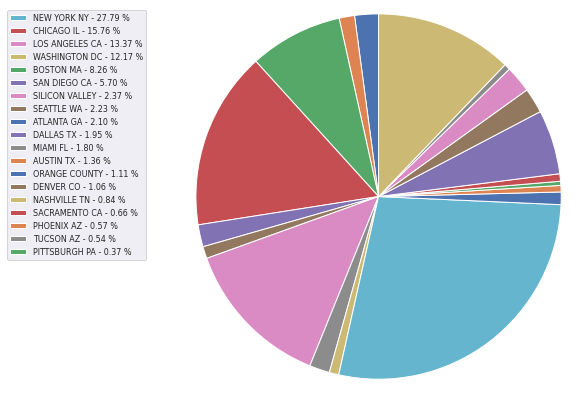

In [36]:
x = city_customers.index
y = city_customers.values
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,  startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)



New York City has the highest Cab users with 27.79%

In [37]:
city_y_customers = df[df.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_y_customers 

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

In [38]:
city_p_customers = df[df.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_p_customers 

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

Text(0.5, 1.0, 'Transaction per City for Yellow Cab')

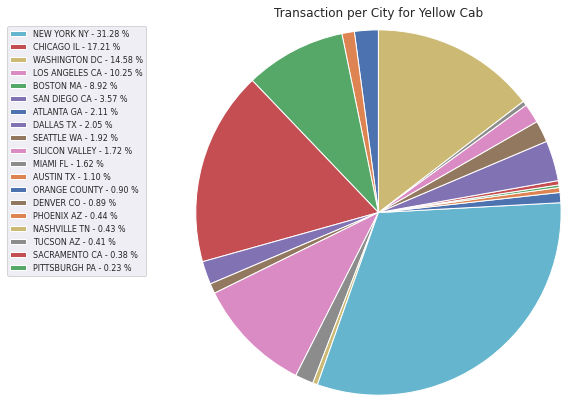

In [39]:
x = city_y_customers.index
y = city_y_customers.values
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,  startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title('Transaction per City for Yellow Cab')


Text(0.5, 1.0, 'Transaction per City for Pink Cab')

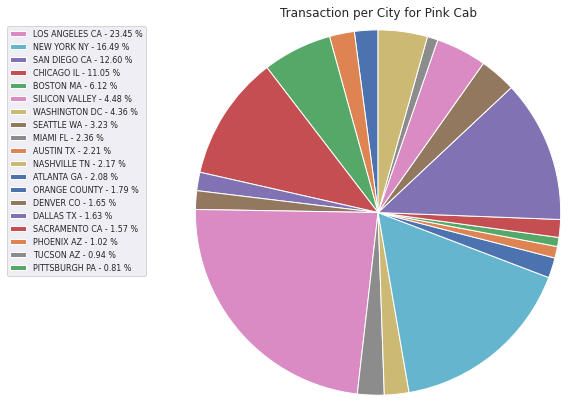

In [40]:
x = city_p_customers.index
y = city_p_customers.values
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,  startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title('Transaction per City for Pink Cab')

Yellow cab has the highest transaction in NY which has the highest cab users

In [41]:
df

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,3,2018,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,4,2018,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,2018-06-07,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,6,2018,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,2018-02-08,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2,2018,51406,Cash,Female,29,6829,"418,859","127,001"


In [42]:
gender_y_cab=df[df.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()


In [43]:
gender_p_cab=df[df.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()


Text(0.5, 1.0, 'Price Charged per Gender for Yellow Cab')

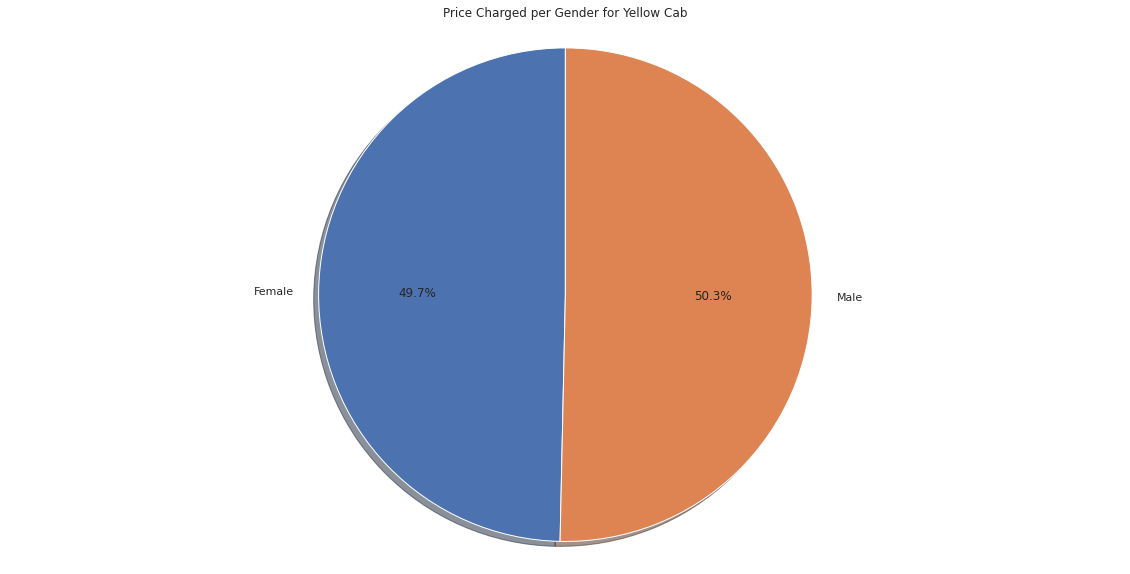

In [44]:
x = gender_y_cab.index
y = gender_y_cab.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(y , labels=x, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')

Text(0.5, 1.0, 'Price Charged per Gender for Pink Cab')

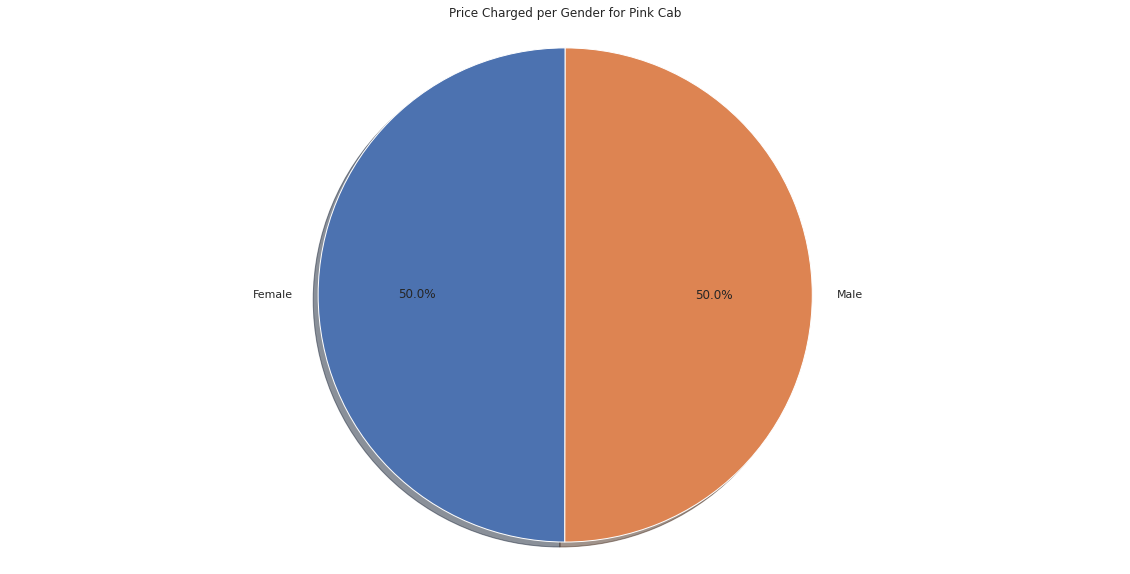

In [45]:
x = gender_p_cab.index
y = gender_p_cab.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(y , labels=x, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Pink Cab')

Yellow cab charged less for female customers

Pink cab charged the same for male and female

In [46]:
df['Profit'] = (df['Price_Charged']-df['Cost_of_Trip'])


In [47]:
df.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,29290,Card,Male,28,10813,"814,885","24,701",57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,"814,885","24,701",281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,"814,885","24,701",194.6480
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,27703,Card,Male,27,9237,"814,885","24,701",23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,"814,885","24,701",253.9808


In [48]:
df.select_dtypes('object').columns


Index(['Company', 'City', 'Payment_Mode', 'Gender', 'Population', 'Users'], dtype='object')

In [49]:
df_numeric = df.drop(['Company', 'City', 'Payment_Mode', 'Gender', 'Population', 'Users'],axis=1)

In [50]:
df_numeric

,Transaction_ID,Date of Travel,KM Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer ID,Age,Income (USD/Month),Profit
0,10000011,2016-08-01,30.45,370.95,313.6350,8,2016,29290,28,10813,57.3150
1,10351127,2018-07-21,26.19,598.70,317.4228,7,2018,29290,28,10813,281.2772
2,10412921,2018-11-23,42.55,792.05,597.4020,11,2018,29290,28,10813,194.6480
3,10000012,2016-06-01,28.62,358.52,334.8540,6,2016,27703,27,9237,23.6660
4,10320494,2018-04-21,36.38,721.10,467.1192,4,2018,27703,27,9237,253.9808
...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,38.40,668.93,525.3120,3,2018,51406,29,6829,143.6180
359388,10319775,2018-04-13,3.57,67.60,44.5536,4,2018,51406,29,6829,23.0464
359389,10347676,2018-06-07,23.46,331.97,337.8240,6,2018,51406,29,6829,-5.8540
359390,10358624,2018-02-08,27.60,358.23,364.3200,2,2018,51406,29,6829,-6.0900


In [51]:
df_numeric = df_numeric.drop(['Customer ID','Date of Travel','Transaction_ID'],axis=1)

<AxesSubplot:>

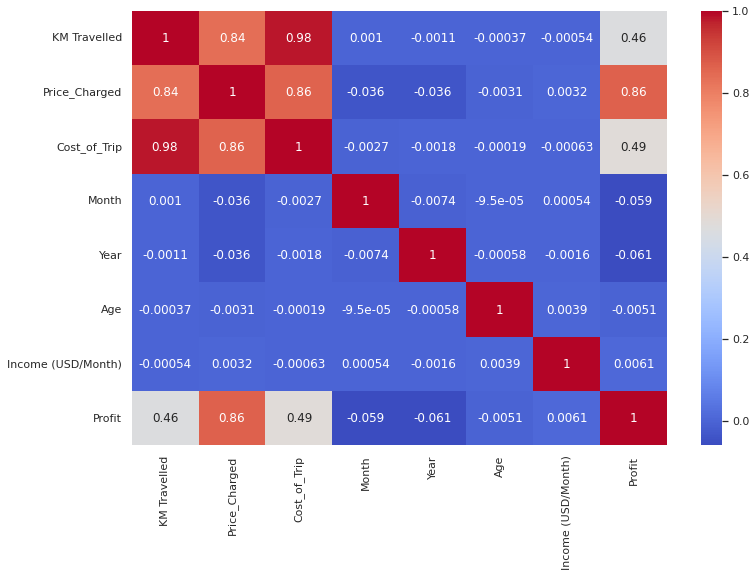

In [52]:
plt.figure(figsize=(12,8))

sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')


There is a correlation between Margin and Profit 0.86

Based on the above analysis Yello cab is recommended for investment:
* Yellow cab has more customers overall
* NY has most taxi users and they mostly use yellow cab
* Yellow cab has higher profit
* Yellow cab has transactions  per year compared to pink cab